In [5]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logit
sys.path.append('../src')

from neural_network import NeuralNetwork, Neuron
from functions_helpper import get_training_data, f, g, h

# Ej 6 parte b

Considere las siguientes funciones con las entradas en el rango [-1,1] :
    
    f(x) = x3-x2+1 
    g(x,y) = 1- x2 - y2 
    h(x,y) =x+y

Utilice su implementación para ajustar estas funciones, inicializando los pesos con valores aleatorios y utilizando como ejemplos de entrenamiento 40 puntos uniformemente distribuidos en el espacio. 

Grafique:
    
    i.  el error cometido en el conjunto de entrenamiento en cada iteración;
    ii. las aproximación de las funciones obtenidas luego de 10^2, 10^3, 10^4 y 10^5 iteraciones.


In [6]:
#Ajusta y grafica los resutlados
def plot_results(neural_network_f, neural_network_g, neural_network_h):
    
    training_data = get_training_data ()
    
    data_f = training_data.drop (['g', 'h'], axis=1)
    neural_network_f.fit (training_examples=data_f, target_attribute='f')

    data_g = training_data.drop (['f', 'h'], axis=1)
    data_g['g'] = data_g['g'].apply (lambda x: Neuron.sigmoid (x))
    neural_network_g.fit (training_examples=data_g, target_attribute='g')

    data_h = training_data.drop (['f', 'g'], axis=1)
    data_h['h'] = data_h['h'].apply (lambda x: Neuron.sigmoid(x))
    neural_network_h.fit (training_examples=data_h, target_attribute='h')

    P = [[],[],[]]
    F = training_data['f']
    G = training_data['g']
    H = training_data['h']

    for index, point in data_f.drop(['f'], axis=1).iterrows():

        predict_f = neural_network_f.predict(point)
        P[0].append(predict_f)

        predict_g = neural_network_g.predict(point)
        P[1].append(logit(predict_g))

        predict_h = neural_network_h.predict(point)
        P[2].append(logit(predict_h))


    plt.grid(True)
    plt.ylabel ('Max Iter='+str(max_iter))
    plt.plot(neural_network_f.get_errors(), color='b', label='Error f')
    plt.plot (neural_network_g.get_errors (), color='r', label='Error g')
    plt.plot (neural_network_h.get_errors (), color='y', label='Error h')
    plt.legend (loc=0)
    plt.show ()

    plt.grid(True)
    plt.ylabel ('Max Iter='+str(max_iter))
    plt.plot(P[0], color='b', label='Predict')
    plt.plot(F, color='r', label='f')
    plt.legend (loc=0)
    plt.show ()

    plt.grid(True)
    plt.ylabel ('Max Iter=' + str (max_iter))
    plt.plot(P[1], color='b', label='Predict')
    plt.plot(G, color='r', label='g')
    plt.legend (loc=0)
    plt.show ()

    plt.grid(True)
    plt.ylabel ('Max Iter=' + str (max_iter))
    plt.plot(P[2], color='b', label='Predict')
    plt.plot(H, color='r', label='h')
    plt.legend (loc=0)
    plt.show ()
    


Inicializamos los pesos de la red de forma aleatroia.

In [7]:
def get_neural_network(max_iter):
    
    hidden_layer_weights = [np.random.rand(2), np.random.rand(2)]
    output_layer_weights = [np.random.rand(2)]
    hidden_bias = np.random.rand(2)
    output_bias = np.random.rand(1)
    
    neural_network_f = NeuralNetwork(
                input_layer_size=2,
                hidden_layer_size=2,
                output_layer_size=1,
                hidden_layer_weights=hidden_layer_weights,
                output_layer_weights=output_layer_weights,
                hidden_layer_bias=hidden_bias,
                output_layer_bias=output_bias,
                max_iter=max_iter
    )

    neural_network_g = NeuralNetwork(
                input_layer_size=2,
                hidden_layer_size=2,
                output_layer_size=1,
                hidden_layer_weights=hidden_layer_weights,
                output_layer_weights=output_layer_weights,
                hidden_layer_bias=hidden_bias,
                output_layer_bias=output_bias,
                max_iter=max_iter
    )

    neural_network_h = NeuralNetwork(
                input_layer_size=2,
                hidden_layer_size=2,
                output_layer_size=1,
                hidden_layer_weights=hidden_layer_weights,
                output_layer_weights=output_layer_weights,
                hidden_layer_bias=hidden_bias,
                output_layer_bias=output_bias,
                max_iter=max_iter
    )

    neural_network_f.print()
    
    return neural_network_f, neural_network_g, neural_network_h

Para todos los casos se usaron los mismos pesos iniciales e igual disenño de red.

# Iteraciones = 10 ^2

------------------------
Amount of Inputs
2
------------------------
---> Hidden Layer
Total neurons: 2
   Neuron 0
      Weight: 0.9216022325065075
      Weight: 0.3795104343572949
      Bias: 0.5144993610227143
   Neuron 1
      Weight: 0.7902699957633691
      Weight: 0.08601542754378788
      Bias: 0.15712904583584675
------------------------
---> Output Layer
Total neurons: 1
   Neuron 0
      Weight: 0.3307133582115013
      Weight: 0.6370135027905663
      Bias: 0.6661792721067928


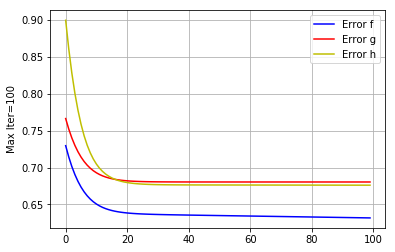

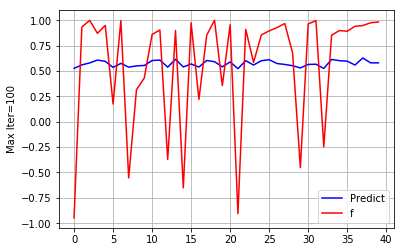

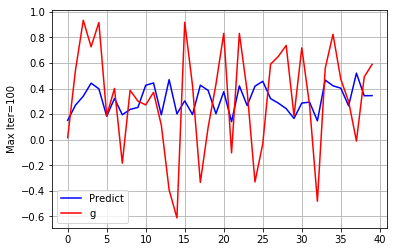

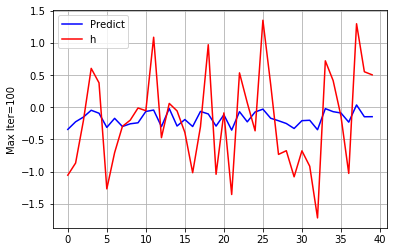

In [8]:
    max_iter = 10 ** 2
    
    #Creamos la red neuronal con 2 entradas, una capa oculta con 2 neuronas y una salida
    neural_network_f, neural_network_g, neural_network_h = get_neural_network(max_iter)
    plot_results(neural_network_f, neural_network_g, neural_network_h)
    

# Iteraciones = 10 ^3

------------------------
Amount of Inputs
2
------------------------
---> Hidden Layer
Total neurons: 2
   Neuron 0
      Weight: 0.878952846528508
      Weight: 0.7605155005159618
      Bias: 0.6230410958851843
   Neuron 1
      Weight: 0.4875849526972118
      Weight: 0.3262501436759966
      Bias: 0.08942308393028597
------------------------
---> Output Layer
Total neurons: 1
   Neuron 0
      Weight: 0.8901005800145053
      Weight: 0.09643049524297176
      Bias: 0.3990316298344535


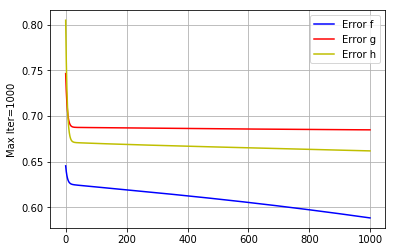

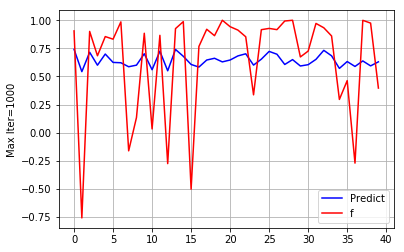

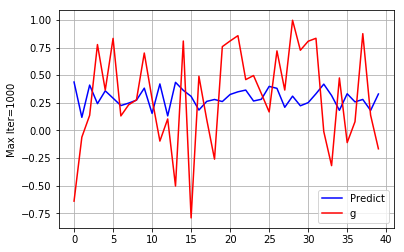

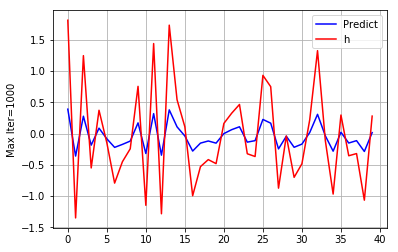

In [9]:
    max_iter = 10 ** 3
    
    #Creamos la red neuronal con 2 entradas, una capa oculta con 2 neuronas y una salida
    neural_network_f, neural_network_g, neural_network_h = get_neural_network(max_iter)
    plot_results(neural_network_f, neural_network_g, neural_network_h)

# Iteraciones = 10 ^4

------------------------
Amount of Inputs
2
------------------------
---> Hidden Layer
Total neurons: 2
   Neuron 0
      Weight: 0.6392581157185606
      Weight: 0.39404119618596034
      Bias: 0.1352020563995845
   Neuron 1
      Weight: 0.5226020835576872
      Weight: 0.11643815361193999
      Bias: 0.5614792650328387
------------------------
---> Output Layer
Total neurons: 1
   Neuron 0
      Weight: 0.8109222235994604
      Weight: 0.3801979214233948
      Bias: 0.8303926929567623


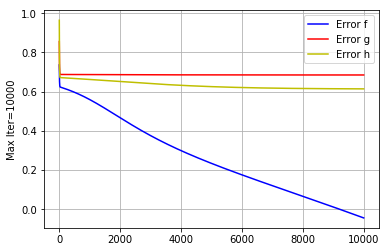

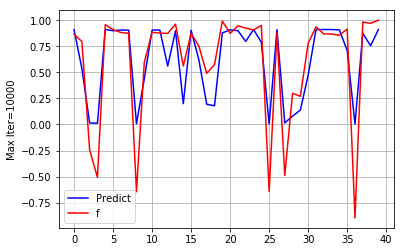

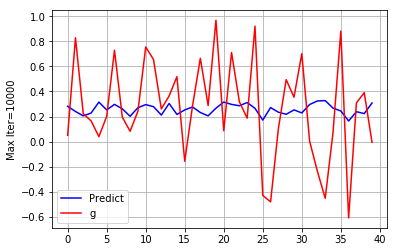

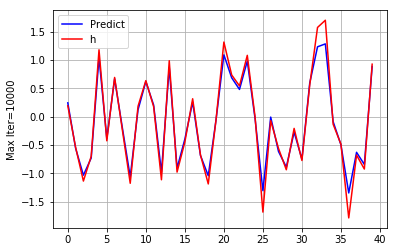

In [10]:
    max_iter = 10 ** 4
    
    #Creamos la red neuronal con 2 entradas, una capa oculta con 2 neuronas y una salida
    neural_network_f, neural_network_g, neural_network_h = get_neural_network(max_iter)
    plot_results(neural_network_f, neural_network_g, neural_network_h)

# Iteraciones = 10 ^5

------------------------
Amount of Inputs
2
------------------------
---> Hidden Layer
Total neurons: 2
   Neuron 0
      Weight: 0.07086033288053284
      Weight: 0.9598296784915263
      Bias: 0.5128248755609458
   Neuron 1
      Weight: 0.915046288239318
      Weight: 0.2839293170120708
      Bias: 0.09242431658109296
------------------------
---> Output Layer
Total neurons: 1
   Neuron 0
      Weight: 0.19155530181284597
      Weight: 0.9512568159892466
      Bias: 0.04792918311291361


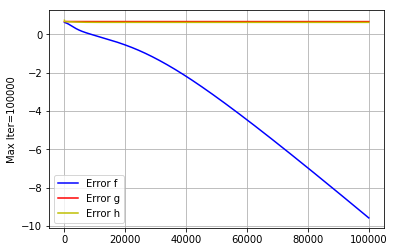

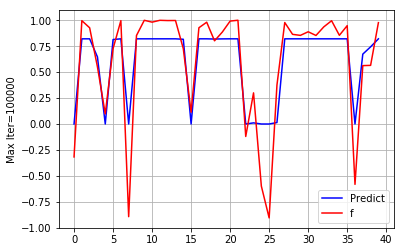

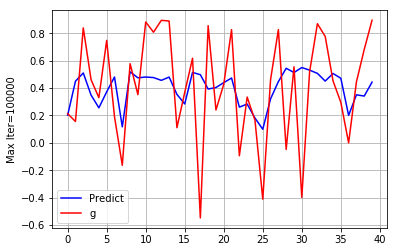

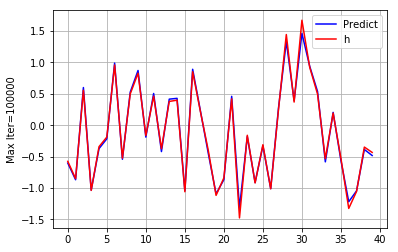

In [11]:
    max_iter = 10 ** 5
    
    #Creamos la red neuronal con 2 entradas, una capa oculta con 2 neuronas y una salida
    neural_network_f, neural_network_g, neural_network_h = get_neural_network(max_iter)
    plot_results(neural_network_f, neural_network_g, neural_network_h)